<a href="https://colab.research.google.com/github/Anuj-Main/Data_Analysiss_Projects/blob/main/Predict%20Survival%20on%20Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualization

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

If you're using google colab Follow these steps:
1: In the right side cLick on the files.
2: Click on the upper side arrow or upload to session storage.
3: Select your data set from local or your computer.
4: Your data set will show on your colab files.
5: Copy the path of that files and paste it in single quote.

In [ ]:
Train_Data=pd.read_csv('/content/Train_Titanic.csv')
Train_Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Types of Variables:
1. Continuous:Age & Fare
2. Categorical: Sex & Embarked
3. Discrete: SibSp & Parch
4. Alphanumberic: Cabin


In [ ]:
Train_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Now we can see the total entries and missing values. As we can see there are 891 entries and 12 columns but we can see in Age, Cabin and Embarked these three have missing value. So first we have to fix the missing data.

In [ ]:
Train_Data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In our train data:
1. 177 null values in Age column.
2. 687 missing values in Cabin column.
3. 2 missing values in Embarked column. 

# **Exploratory Data Annalysis**
Now we're going to visualize the correlation of each variable with our target variable will be Survived.

#Pclass


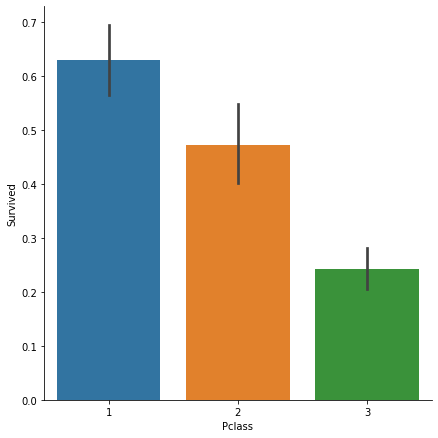

In [ ]:
Pclass_plot=sns.catplot(x='Pclass',y='Survived',data=Train_Data, kind='bar',height=6)

**Higher Class** have more chances of **Survival**

#Sex


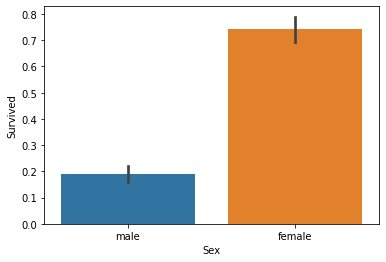

In [ ]:
Sex_plot=sns.barplot(x='Sex',y='Survived',data=Train_Data)

From the above Graph we easily see that **Females have more chances of survival in comparison to males.**

#Age


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


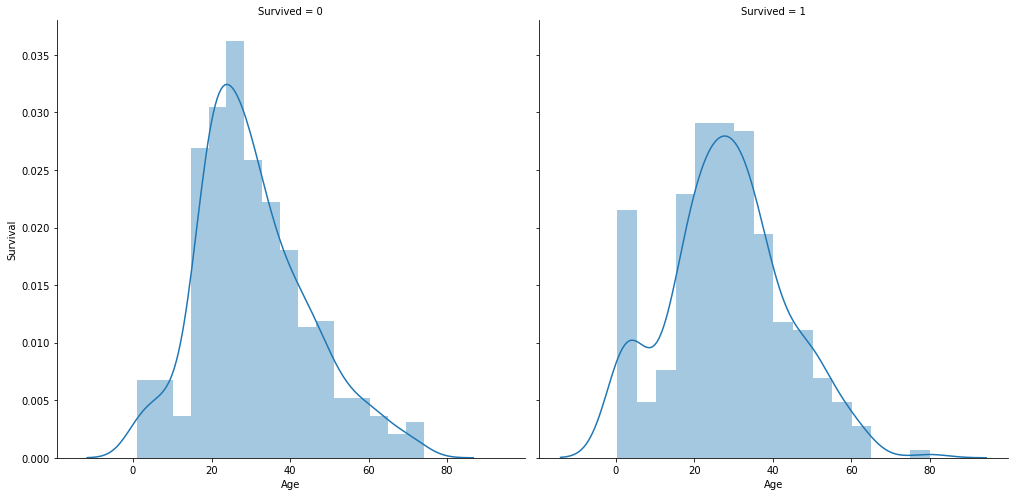

In [ ]:
Age_plot=sns.FacetGrid(data=Train_Data,col='Survived',height=7)
Age_plot=Age_plot.map(sns.distplot, 'Age')
Age_plot=Age_plot.set_ylabels('Survival')

As we can see the above the graph shows **More Age have Less chances of Survival**

#SibSp - Number of Siblings/Spouses 

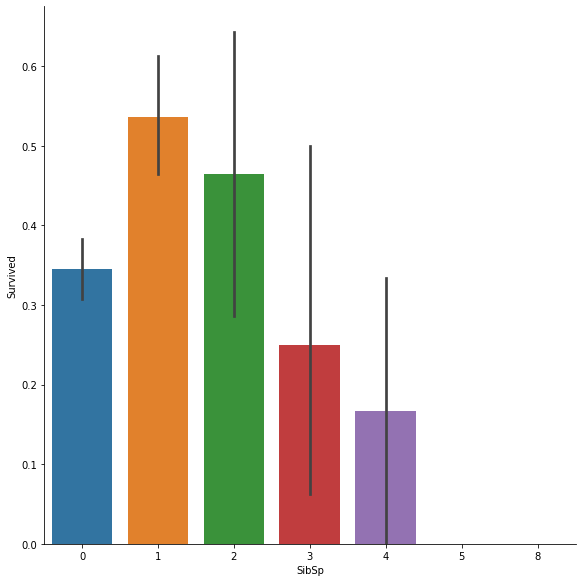

In [ ]:
SibSp_plot=sns.catplot(x='SibSp',y='Survived',data=Train_Data,kind='bar',height=8)  

Passengers having **1 or 2 siblings have good chances of survival**.

Now it's shows **More Number of Siblings have less chances of Survival**

#Embarked

In [ ]:
Train_Data['Embarked'].isnull().sum()

2

In [ ]:
Train_Data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Filling 2 missing values

In [ ]:
Train_Data['Embarked']=Train_Data['Embarked'].fillna('S')

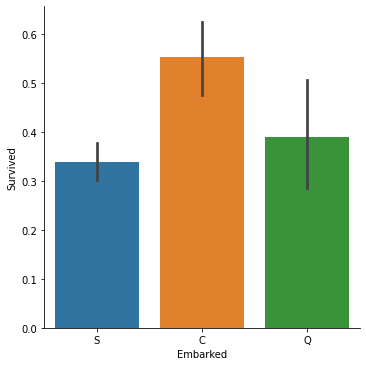

In [ ]:
sns.catplot(x='Embarked',y='Survived',data=Train_Data,height=5,kind='bar')

#Data Preprocessing or Data Cleaning

In [ ]:
Train_Data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

**Missing Values of Age Column**

In [ ]:
Age_mean=Train_Data['Age'].mean()
Age_std_deviation=Train_Data['Age'].std()
print(Age_mean)
print(Age_std_deviation)

29.69911764705882
14.526497332334044


In [ ]:
Age_random=np.random.randint(Age_mean-Age_std_deviation,Age_mean+Age_std_deviation, size=891)
Age_newset=Train_Data['Age'].copy()
Age_newset[np.isnan(Age_newset)]=Age_random
Train_Data['Age']=Age_newset
Train_Data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

#Dropping Columns

In [ ]:
col_drop = ["PassengerId", "Ticket", "Cabin", "Name"]
Train_Data.drop(Col_drop, axis=1, inplace=True)
Train_Data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,32.0,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


**When you Run above cell it will shows the error as ["PassengerId", "Ticket", "Cabin", "Name"] is not in axis 1.**
**Then you have to just Run all Cells then it will shows the result of your data.**